In [1]:
import pandas as pd
import numpy as np


intact_data =[]
file_path = "/home/maburid/PPI/intact.txt"
with open(file_path, 'r') as f:
    for line in f:                            
        line = line.split()
        intact_data.append(line)


In [2]:
tem_data = []
data =[]
for i in range(len(intact_data)):
    for j in range(len(intact_data[i])):
        if intact_data[i][j][0:3] == "uni":
            tem_data.append(intact_data[i])
            break
for i in range(len(tem_data)):            
    for m in range(len(tem_data[i])):
        if tem_data[i][m][0:10] == 'taxid:9606':
            data.append(tem_data[i])
            break 


In [3]:
dic = {}
for i in range(len(data)):
    pairs =[]
    pp_id =[] 
    taxid =[] 
    for v in data[i]:
        if v[0:4] == "unip": 
            pairs.append(v)
    pp_id.append(pairs)
    for m in data[i]:
        if m[0:10] == 'taxid:9606':
            taxid.append(m)
    pp_id.append(taxid)
    dic[str(i)] = pp_id 

    

In [4]:
len(dic)

539126

In [5]:
p1 =[]
p2 =[]

for key in dic:
    if len(dic[str(key)][1]) > 1:                
        if len(dic[str(key)][0]) > 1:   
            p1.append(dic[str(key)][0][0][10:])      
            p2.append(dic[str(key)][0][1][10:])              
            


In [6]:
gene_labels =pd.read_csv("/home/maburid/PPI/for_ppi.txt")   # with or without sep='\t'  

In [7]:
int_genes =[] 

for i in range(len(p1)):
    anc_genes1 = list(gene_labels[gene_labels["UniProtKB Gene Name ID"] == str(p1[i])]["Gene name"] )
    anc_genes2 = list(gene_labels[gene_labels["UniProtKB Gene Name ID"] == str(p2[i])]["Gene name"] )
    anc_genes1 = list(dict.fromkeys(anc_genes1))          
    anc_genes2 = list(dict.fromkeys(anc_genes2))   
    
    if len(anc_genes1) == 0 or len(anc_genes2) ==0:
        continue 
    if len(anc_genes1) == 1 and len(anc_genes2) ==1:
        com = [anc_genes1[0],anc_genes2[0]]
        int_genes.append(com)
    if len(anc_genes1) > 1 and len(anc_genes2) ==1:
        for z in anc_genes1:
            com =[z,anc_genes2[0]]
            int_genes.append(com)
    if len(anc_genes1) == 1 and len(anc_genes2) >1:
        for z in anc_genes2:
            com =[anc_genes1[0],z]
            int_genes.append(com)
    if len(anc_genes1) > 1 and len(anc_genes2) >1:
        for z1 in anc_genes1:
            for z2 in anc_genes2:
                com =[z1,z2]
                int_genes.append(com)

    #if i ==100000:
     #   break
    
    #anc_genes = list(dict.fromkeys(anc_genes))
    #if len(anc_genes) > 1:                    
     #   print(p)                              
                    
#int_genes

In [8]:
int_genes_ = pd.DataFrame(int_genes)
int_genes_.columns = ["Gene_1","Gene_2"]                                                        
int_genes_.to_csv("/home/maburid/PPI/interacting_gene_pairs.txt", sep="\t", header=None,index=False)

In [9]:
print(len(int_genes))
int_genes_.shape

337285


(337285, 2)

In [6]:
import csv
#w = csv.writer(open("/home/maburid/PPI/", "w"))
sets =[]
with open("/home/maburid/PPI/muta_rate_ana_com.csv") as f:
    readCSV = csv.reader(f, delimiter=',')
    for line in readCSV:                            
        sets.append(line)
sets

[['NM0018_NM0039',
  'RAMP2',
  'DNAJC11',
  'OXCT1',
  'ICAM2',
  'RASIP1',
  'ECSCR',
  'FOXC1',
  'ESRRB',
  'CCM2L'],
 ['NM0079_NM0013',
  'MARVELD2',
  'NOTCH4',
  'FAM171A1',
  'TFAP2B',
  'DLL4',
  'CDH5',
  'HEY1',
  'ADGRL4',
  'CYFIP2'],
 ['NM0077_NM0018',
  'DNAJC11',
  'TEK',
  'FOXC1',
  'EMCN',
  'OXCT1',
  'ESRRB',
  'PODXL'],
 ['NM0018_NM0022',
  'HSPA12B',
  'OXCT1',
  'ARHGEF15',
  'FOXC1',
  'RASIP1',
  'CCM2L',
  'NOS3',
  'ESRRB',
  'DNAJC11'],
 ['NM0019_NM0082',
  'NOTCH4',
  'MUC15',
  'DNAJC11',
  'OXCT1',
  'FOXC1',
  'CDH13',
  'VWF',
  'DIPK2B',
  'DLL4'],
 ['NM0077_NM0076',
  'MARVELD2',
  'TBC1D4',
  'MUC15',
  'NUDT4',
  'TEK',
  'STUM',
  'FAM13A',
  'EMCN',
  'PPP1R1A',
  'CYFIP2',
  'PODXL'],
 ['NM0077_NM0019',
  'MUC15',
  'DNAJC11',
  'TEK',
  'FOXC1',
  'EMCN',
  'OXCT1',
  'PODXL'],
 ['NM0019_NM0039',
  'RAMP2',
  'MUC15',
  'DNAJC11',
  'OXCT1',
  'ICAM2',
  'RASIP1',
  'ECSCR',
  'FOXC1',
  'CCM2L'],
 ['NM0077_NM0079',
  'MARVELD2',
  'FAM171A1',


In [11]:
num_of_int ={}

for k in range(len(sets)):
    gset = sets[k][1:]
    summ =0
    for g in gset:
        side1 =list(int_genes_[int_genes_["Gene_1"] == str("MICOS13")]["Gene_2"])
        side2 =list(int_genes_[int_genes_["Gene_2"] == str("MICOS13")]["Gene_1"])
        two_sides = side1 + side2             
        two_sides = list(dict.fromkeys(two_sides))      # remove redunduncy 
        summ += len(two_sides)
    num_of_int[str(sets[k][0])] = summ 

In [15]:
num_of_int

{'NM0002_NM0006': 210,
 'NM0002_NM0011': 210,
 'NM0002_NM0013': 240,
 'NM0002_NM0037': 210,
 'NM0002_NM0051': 210,
 'NM0002_NM0055': 210,
 'NM0002_NM0077': 180,
 'NM0006_NM0071': 360,
 'NM0006_NM0076': 360,
 'NM0010_NM0076': 420,
 'NM0011_NM0019': 240,
 'NM0011_NM0071': 360,
 'NM0011_NM0076': 360,
 'NM0018_NM0022': 270,
 'NM0018_NM0039': 270,
 'NM0019_NM0039': 270,
 'NM0019_NM0082': 270,
 'NM0021_NM0071': 360,
 'NM0022_NM0032': 480,
 'NM0023_NM0019': 240,
 'NM0023_NM0071': 360,
 'NM0023_NM0080': 240,
 'NM0034_NM0071': 360,
 'NM0037_NM0039': 270,
 'NM0037_NM0071': 360,
 'NM0037_NM0076': 360,
 'NM0037_NM0079': 240,
 'NM0039_NM0010': 330,
 'NM0039_NM0032': 480,
 'NM0041_NM0019': 240,
 'NM0041_NM0071': 360,
 'NM0041_NM0076': 360,
 'NM0051_NM0071': 360,
 'NM0051_NM0076': 360,
 'NM0051_NM0079': 240,
 'NM0055_NM0080': 240,
 'NM0063_NM0019': 240,
 'NM0063_NM0071': 360,
 'NM0068_NM0071': 360,
 'NM0068_NM0076': 360,
 'NM0077_NM0013': 240,
 'NM0077_NM0018': 210,
 'NM0077_NM0019': 210,
 'NM0077_NM

In [13]:
import operator
# sort
num_of_int2 = sorted(num_of_int.items(), key=operator.itemgetter(1),reverse=True)
num_of_int2 = pd.DataFrame(num_of_int2)
num_of_int2.columns =["Module Name","Number of Gene Interactions"] 


[Text(0, 0, 'NM0022_NM0032'),
 Text(0, 0, 'NM0039_NM0032'),
 Text(0, 0, 'NM0088_NM0076'),
 Text(0, 0, 'NM0010_NM0076'),
 Text(0, 0, 'NM0021_NM0071'),
 Text(0, 0, 'NM0006_NM0076'),
 Text(0, 0, 'NM0041_NM0076'),
 Text(0, 0, 'NM0034_NM0071'),
 Text(0, 0, 'NM0051_NM0071'),
 Text(0, 0, 'NM0011_NM0076'),
 Text(0, 0, 'NM0011_NM0071'),
 Text(0, 0, 'NM0037_NM0071'),
 Text(0, 0, 'NM0068_NM0071'),
 Text(0, 0, 'NM0037_NM0076'),
 Text(0, 0, 'NM0023_NM0071'),
 Text(0, 0, 'NM0041_NM0071'),
 Text(0, 0, 'NM0051_NM0076'),
 Text(0, 0, 'NM0006_NM0071'),
 Text(0, 0, 'NM0068_NM0076'),
 Text(0, 0, 'NM0063_NM0071'),
 Text(0, 0, 'NM0077_NM0071'),
 Text(0, 0, 'NM0077_NM0076'),
 Text(0, 0, 'NM0039_NM0010'),
 Text(0, 0, 'NM0018_NM0022'),
 Text(0, 0, 'NM0080_NM0013'),
 Text(0, 0, 'NM0019_NM0082'),
 Text(0, 0, 'NM0037_NM0039'),
 Text(0, 0, 'NM0079_NM0013'),
 Text(0, 0, 'NM0018_NM0039'),
 Text(0, 0, 'NM0019_NM0039'),
 Text(0, 0, 'NM0079_NM0039'),
 Text(0, 0, 'NM0037_NM0079'),
 Text(0, 0, 'NM0023_NM0019'),
 Text(0, 0

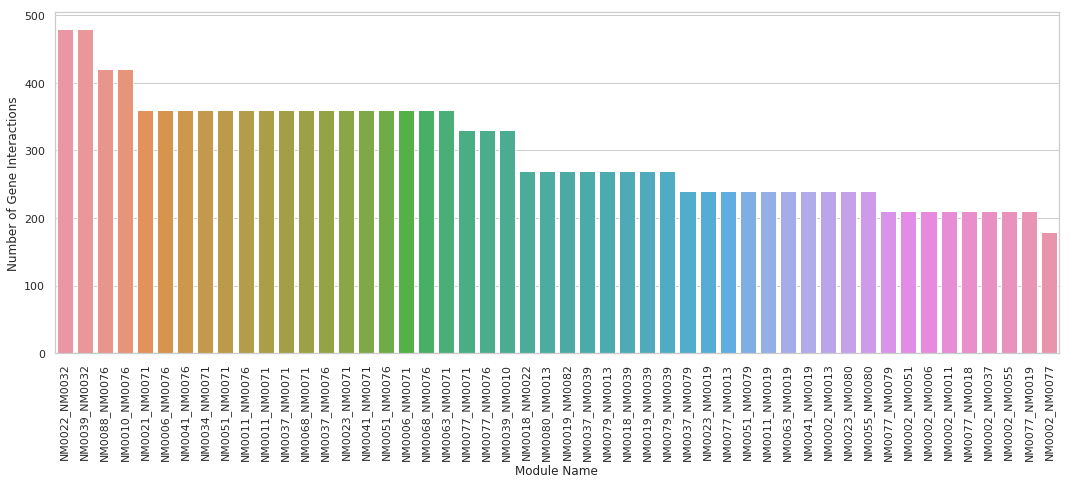

In [14]:
import seaborn as sns
from matplotlib import pyplot

sns.set(style="whitegrid")
a4_dims = (18, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Module Name", y="Number of Gene Interactions", data=num_of_int2)
g.set_xticklabels(ax.get_xticklabels(),rotation=90)


In [13]:
## For other sets:
import pandas as pd

int_genes_ = pd.read_csv("/home/maburid/PPI/interacting_gene_pairs.txt", header=None, sep='\t')   # with or without sep='\t'          
int_genes_.columns = ["Gene_1","Gene_2"] 


In [3]:
import pandas as pd                                  
import sys, argparse                                         
import matplotlib.pyplot as plt                            
import json                                           
import numpy as np                                       
from decimal import Decimal                               
import collections                                      
import matplotlib.patches as mpatches                         
import matplotlib.pyplot as plt                           
from scipy.stats import ttest_ind                       
import matplotlib.patches as patches
import csv
import seaborn as sns

gene_list1 = np.loadtxt('/home/maburid/gene-oracle/files_for_arguments/new_arguments/plot/phase4_k_scores.txt',dtype=str)
gene_count1 = pd.read_csv("/home/maburid/gene-oracle/files_for_arguments/new_arguments/gene_num_combined_normal.txt" , sep="\t", header=None)
gene_list2= np.loadtxt('/home/maburid/gene-oracle/files_for_arguments/new_arguments/plot/phase2_k_scores.txt',dtype=str)
gene_count2 = pd.read_csv("/home/maburid/gene-oracle/files_for_arguments/new_arguments/gene_num_kidney_normal.txt" , sep="\t", header=None)

p_val1 = pd.read_csv("/home/maburid/gene-oracle/files_for_arguments/new_arguments/plot/phase4_k_pvalues.txt", sep="\t")
p_val2 = pd.read_csv("/home/maburid/gene-oracle/files_for_arguments/new_arguments/plot/phase2_k_pvalues.txt", sep="\t")

gene_list2 = pd.DataFrame(gene_list2)
new_header = gene_list2.iloc[0] 
gene_list2 = gene_list2[1:] 
gene_list2.columns = new_header 

gene_list1 = pd.DataFrame(gene_list1)
new_header = gene_list1.iloc[0] 
gene_list1 = gene_list1[1:] 
gene_list1.columns = new_header 


all_list =[] 
all_list.append(["sets_name","set1_mu","set2_mu","set1set2_mu","set1_std","set2_std","set1set2_std","set1_p","set2_p", \
                 "set1set2_p","set1_Gnum","set2_Gnum","set1set2_Gnum"])  
modules= list(p_val1["name"])
for i in range(len(modules)):
    sub_list =[]
    sub_list.append(modules[i])
    mu1 = np.array(gene_list2[gene_list2["name"] == str(modules[i][0:6])])[0][2]
    sub_list.append(mu1)
    mu2 = np.array(gene_list2[gene_list2["name"] == str(modules[i][7:14])])[0][2]
    sub_list.append(mu2)
    mu3 = np.array(gene_list1[gene_list1["name"] == str(modules[i])])[0][2]
    sub_list.append(mu3)

    std1 = np.array(gene_list2[gene_list2["name"] == str(modules[i][0:6])])[0][3]
    sub_list.append(std1)
    std2 = np.array(gene_list2[gene_list2["name"] == str(modules[i][7:14])])[0][3]
    sub_list.append(std2)
    std3 = np.array(gene_list1[gene_list1["name"] == str(modules[i])])[0][3]
    sub_list.append(std3)

    p_value1 = np.array(p_val2[p_val2["name"] == str(modules[i][0:6])])[0][1]
    sub_list.append(p_value1)
    p_value2 = np.array(p_val2[p_val2["name"] == str(modules[i][7:14])])[0][1]
    sub_list.append(p_value2)
    p_value3 = np.array(p_val1[p_val1["name"] == str(modules[i])])[0][1]
    sub_list.append(p_value3)

    num1=int(gene_count2[gene_count2[0] == str(modules[i][0:6])][1])
    sub_list.append(num1)
    num2=int(gene_count2[gene_count2[0] == str(modules[i][7:14])][1])
    sub_list.append(num2)
    num3=int(gene_count1[gene_count1[0] == str(modules[i])][1])
    sub_list.append(num3)
    
    all_list.append(sub_list)

all_list =pd.DataFrame(all_list)
all_list.to_csv("/home/maburid/gene-oracle/files_for_arguments/new_arguments/plot/compare_modules.csv",index = None, header=False)

new_header = all_list.iloc[0] #grab the first row for the header
all_list = all_list[1:] #take the data less the header row
all_list.columns = new_header #set the header row as the df header



In [21]:
names__better_than_both =[]
names_better_than_set1 =[]                                                    
names_better_than_set2 =[]  
names__worst_than_both =[]
names_better_than_set2_or_set1 =[] 
names_better_than_either_set1_or_set2 =[] 

modules = {}                                                                
                                                                               
for i in range(len(all_list)):                                                
    if list(all_list["set1set2_p"])[i] <  list(all_list["set1_p"])[i]:            
        if list(all_list["set1set2_p"])[i] < list(all_list["set2_p"])[i]:     
            names__better_than_both.append(list(all_list["sets_name"])[i])         
                                                                               
    if list(all_list["set1set2_p"])[i] <  list(all_list["set1_p"])[i]:
        if list(all_list["set1set2_p"])[i] >= list(all_list["set2_p"])[i]:     
            names_better_than_set1.append(list(all_list["sets_name"])[i])             
                                                                                    
    if list(all_list["set1set2_p"])[i] <  list(all_list["set2_p"])[i]:
        if list(all_list["set1set2_p"])[i] >= list(all_list["set1_p"])[i]:
            names_better_than_set2.append(list(all_list["sets_name"])[i])

    if (list(all_list["set1set2_p"])[i] <  list(all_list["set2_p"])[i]) or (list(all_list["set1set2_p"])[i] <  list(all_list["set1_p"])[i]) :
        names_better_than_set2_or_set1.append(list(all_list["sets_name"])[i])

    if ((list(all_list["set1set2_p"])[i] < list(all_list["set2_p"])[i]) and (list(all_list["set1set2_p"])[i] > \
        list(all_list["set1_p"])[i]) ) or ((list(all_list["set1set2_p"])[i] < list(all_list["set1_p"])[i]) and (list(all_list["set1set2_p"])[i] > \
        list(all_list["set2_p"])[i]) ) :
        names_better_than_either_set1_or_set2.append(list(all_list["sets_name"])[i])
       
    if list(all_list["set1set2_p"])[i] >  list(all_list["set1_p"])[i]:            
        if list(all_list["set1set2_p"])[i] > list(all_list["set2_p"])[i]:     
            names__worst_than_both.append(list(all_list["sets_name"])[i])   

modules["names__better_than_both"] = names__better_than_both
modules["names_better_than_set1"] = names_better_than_set1
modules["names_better_than_set2"] = names_better_than_set2
modules["names__worst_than_both"] = names__worst_than_both
modules["names_better_than_set2_or_set1"] = names_better_than_set2_or_set1
modules["names_better_than_either_set1_or_set2"] = names_better_than_either_set1_or_set2

w = csv.writer(open("/home/maburid/gene-oracle/files_for_arguments/new_arguments/plot/grouped_modules.csv", "w"))
for key, val in modules.items():
    yy = list(modules[key])
    w.writerow(yy)
len(names_better_than_either_set1_or_set2)

43

In [22]:
# sets for iris to be send 
lines =[] 
with open('/home/maburid/gene-oracle/files_for_arguments/new_arguments/kidney_combined_normal.txt') as f:
    for line in f:
        line = line.split() 
        lines.append(line)
    
get_sets = []
for j in range(len(names_better_than_either_set1_or_set2)):  
    for i in range(len(lines)):
        if str(names_better_than_either_set1_or_set2[j]) ==  lines[i][0]:
            get_sets.append(lines[i])
            
#w = csv.writer(open("/home/maburid/gene-oracle/files_for_arguments/new_arguments/muta_rate_ana_com.csv", "w"))
#for m in get_sets: 
#    w.writerow(m)



In [23]:
sets = get_sets

num_of_int ={}

for k in range(len(sets)):
    gset = sets[k][1:]
    summ =0
    for g in gset:
        side1 =list(int_genes_[int_genes_["Gene_1"] == str("MICOS13")]["Gene_2"])
        side2 =list(int_genes_[int_genes_["Gene_2"] == str("MICOS13")]["Gene_1"])
        two_sides = side1 + side2             
        two_sides = list(dict.fromkeys(two_sides))      # remove redunduncy 
        summ += len(two_sides)
    num_of_int[str(sets[k][0])] = summ 

[Text(0, 0, 'NM0019_NM0050'),
 Text(0, 0, 'NM0018_NM0032'),
 Text(0, 0, 'NM0018_NM0050'),
 Text(0, 0, 'NM0018_NM0014'),
 Text(0, 0, 'NM0019_NM0014'),
 Text(0, 0, 'NM0019_NM0032'),
 Text(0, 0, 'NM0018_NM0026'),
 Text(0, 0, 'NM0019_NM0026'),
 Text(0, 0, 'NM0021_NM0076'),
 Text(0, 0, 'NM0018_NM0071'),
 Text(0, 0, 'NM0013_NM0073'),
 Text(0, 0, 'NM0019_NM0022'),
 Text(0, 0, 'NM0018_NM0013'),
 Text(0, 0, 'NM0018_NM0082'),
 Text(0, 0, 'NM0018_NM0035'),
 Text(0, 0, 'NM0006_NM0018'),
 Text(0, 0, 'NM0041_NM0018'),
 Text(0, 0, 'NM0051_NM0019'),
 Text(0, 0, 'NM0055_NM0018'),
 Text(0, 0, 'NM0019_NM0035'),
 Text(0, 0, 'NM0068_NM0019'),
 Text(0, 0, 'NM0011_NM0018'),
 Text(0, 0, 'NM0082_NM0013'),
 Text(0, 0, 'NM0034_NM0018'),
 Text(0, 0, 'NM0079_NM0063'),
 Text(0, 0, 'NM0023_NM0018'),
 Text(0, 0, 'NM0018_NM0068'),
 Text(0, 0, 'NM0018_NM0037'),
 Text(0, 0, 'NM0034_NM0019'),
 Text(0, 0, 'NM0055_NM0019'),
 Text(0, 0, 'NM0006_NM0019'),
 Text(0, 0, 'NM0021_NM0019'),
 Text(0, 0, 'NM0011_NM0079'),
 Text(0, 0

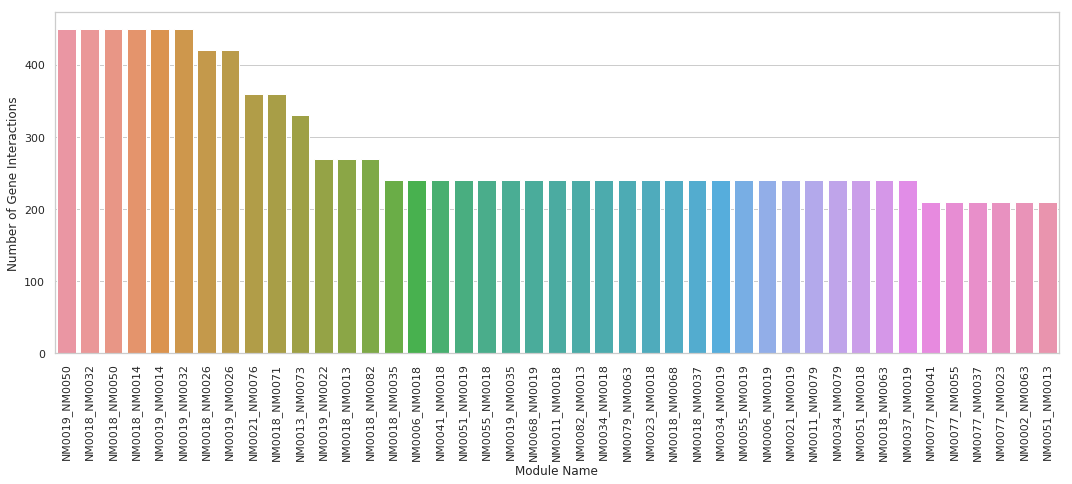

In [24]:
import operator
# sort
num_of_int2 = sorted(num_of_int.items(), key=operator.itemgetter(1),reverse=True)
num_of_int2 = pd.DataFrame(num_of_int2)
num_of_int2.columns =["Module Name","Number of Gene Interactions"] 


import seaborn as sns
from matplotlib import pyplot

sns.set(style="whitegrid")
a4_dims = (18, 6.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

g = sns.barplot(x="Module Name", y="Number of Gene Interactions", data=num_of_int2)
g.set_xticklabels(ax.get_xticklabels(),rotation=90)


## Network analysis 

In [28]:
import numpy as np
import networkx as nx
import pandas as pd 

edges = pd.read_csv("/home/maburid/PPI/interacting_gene_pairs.txt", header=None, sep='\t')   # with or without sep='\t'          

all_edges = []
for i in range(len(edges)):
    all_edges.append(list(edges.iloc[i]))


In [33]:
G = nx.Graph()
G.add_edges_from(all_edges)

print("Number of edges =", G.number_of_edges())
print("Number of nodes =", G.number_of_nodes())

z = nx.algorithms.centrality.betweenness_centrality(G, )


Number of edges = 196601
Number of nodes = 15813


{'LMO3': 0.00015812025739211127,
 'PSG3': 1.393421565821458e-06,
 'PIPOX': 2.2267972280716773e-06,
 'ITIH6': 0.00012809345643614273,
 'NACA': 6.069316633071553e-05,
 'TBC1D20': 2.86078057181594e-06,
 'SLURP1': 1.720465417106108e-07,
 'ANAPC5': 8.651659247348505e-05,
 'POMK': 0.00036379153249489077,
 'PAX3': 2.131958120542327e-05,
 'GASK1B': 0.0,
 'SC5D': 3.2299365039454846e-06,
 'TSPAN15': 0.0002793441068728595,
 'DIAPH1': 0.0001869189138830413,
 'ASXL1': 6.809507096554426e-05,
 'SH2D2A': 0.0001675210180124816,
 'C5orf30': 6.928418985780179e-05,
 'TUBAL3': 3.6935624716703105e-06,
 'HSPA4L': 0.00013007781742075758,
 'CST9': 4.402359792189359e-07,
 'ANO5': 1.7031412636030357e-06,
 'RARA': 0.000282253555768879,
 'ZNF383': 1.1259467649851727e-08,
 'RTKN2': 1.0953254746929115e-06,
 'MYZAP': 5.640139584365333e-07,
 'ODF4': 2.8060478322827367e-05,
 'LYST': 8.323233873926749e-06,
 'SRSF2': 0.00019355645611463706,
 'PMPCA': 0.00021672432040503424,
 'CBARP': 3.492431696535418e-05,
 'FITM2': 0.00